In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import sklearn.preprocessing     # For StandardScaler
import sklearn.linear_model      # For LogisticRegression
import sklearn.neural_network    # For MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Load Dataset

In [43]:
data = pd.read_csv("datasets/processed_manifest_dex_final.csv")
data

,Unnamed: 0,id,ACCESS_ALL_DOWNLOADS,ACCESS_BLUETOOTH_SHARE,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_DOWNLOAD_MANAGER,ACCESS_DOWNLOAD_MANAGER_ADVANCED,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,...,23,24,25,26,27,28,29,30,31,32
0,0,0864acb063671894c80220d3f77cbcdcb08f4aabf017cf...,0,0,0,0,0,0,0,0,...,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,1.869884e-13,8.969419e-14
1,1,477c68553ff88f831026e8842fe99fe14b2ddf08821a0c...,0,0,0,0,0,0,1,0,...,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,2.357381e-13,8.621432e-14
2,2,a0371b342482a12a1932b6930f24c5cb84226c325d9e25...,0,0,0,0,0,0,1,0,...,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,2.459566e-13,1.081333e-13
3,3,26d4ebb9a6693d71077f86794f28f1480db6d096c95ecb...,0,0,0,0,0,0,0,0,...,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,2.259297e-13,1.476048e-13
4,4,361c51f12ffc337eb1293a1f49c1a5034ca708a9a46ac4...,0,0,0,0,0,0,0,0,...,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.967504e-13,1.626257e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,10773,Sha256_000C32D446A831E36F727F1331B0579FFC6EF8E...,0,0,0,0,0,0,0,0,...,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.283709e-13,2.820447e-14
10774,10774,Sha256_000869C011E1C7D6A0DF34BB712A2851E736B9C...,0,0,0,0,0,0,0,0,...,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,2.204760e-13,4.507240e-14
10775,10775,Sha256_000C3CF07E99F07C41C685E10978410238609A0...,0,0,0,0,0,0,0,0,...,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,2.182729e-13,8.638476e-14
10776,10776,Sha256_00223AD0498407AF755A9C8D842C9FA5EDCF2E2...,0,0,0,0,0,0,0,0,...,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,2.213128e-13,1.110579e-13


In [44]:
X = data.drop(['Unnamed: 0', "id", "is_malicious"], axis=1)  # Features
y = data["is_malicious"]  # Label

In [45]:
X = X.to_numpy().astype('float32' )
y = y.to_numpy().astype('int32')

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [47]:
print("X:", X_train.shape, X_train.dtype)
print("y:", y_train.shape, y_train.dtype)

X: (8622, 184) float32
y: (8622,) int32


In [48]:
#prepocess data
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
Performance = pd.DataFrame()
Metrics=['Accuracy','Recall','Precision','F1-score']
Performance['Metrics'] = Metrics

# Decision tree

In [50]:
dt=sklearn.tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)



In [51]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 100.00%
Train f1 : 100.00%
Train recall : 100.00%
Train precision : 100.00%


In [52]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Decision Tree'] = [acc,recall,precision,f1]

Test accuracy : 87.99%
Test f1 : 88.54%
Test recall : 88.66%
Test precision : 88.43%


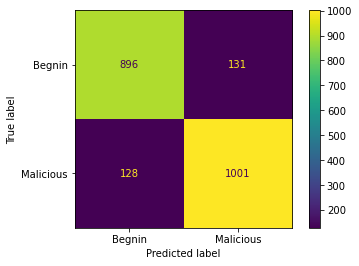

In [53]:
plot_confusion_matrix(dt, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# Random Forest

In [54]:
rf=sklearn.ensemble.RandomForestClassifier(random_state=0,n_estimators=3)
rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [55]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 97.36%
Train f1 : 97.41%
Train recall : 97.22%
Train precision : 97.61%


In [56]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Random Forest'] = [acc,recall,precision,f1]

Test accuracy : 84.79%
Test f1 : 85.36%
Test recall : 84.68%
Test precision : 86.05%


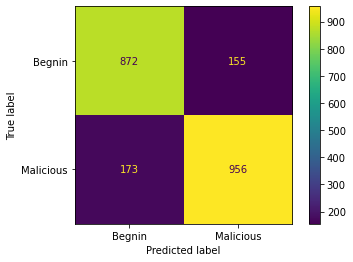

In [57]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# Logistic Regression

In [58]:
lr = sklearn.linear_model.LogisticRegression(C=0.01, random_state=0)  # C=0.01 from Exercise 1.4
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0)

In [59]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 97.36%
Train f1 : 97.41%
Train recall : 97.22%
Train precision : 97.61%


In [60]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['LR'] = [acc,recall,precision,f1]

Test accuracy : 84.79%
Test f1 : 85.36%
Test recall : 84.68%
Test precision : 86.05%


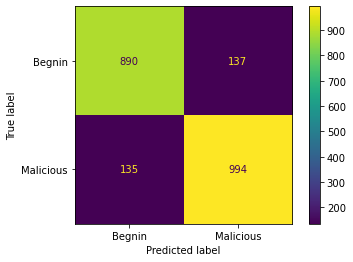

In [61]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# KNN

In [62]:
for k in range(2,8):
    knn = neigh =  sklearn.neighbors.KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    acc_train = sklearn.metrics.accuracy_score(y_pred_train, y_train)
    acc_test = sklearn.metrics.accuracy_score(y_pred_test, y_test)
    print('Train accuracy : %.2f%%'% (100*acc_train))
    print('Test accuracy : %.2f%%'% (100*acc_test))

Train accuracy : 96.45%
Test accuracy : 91.23%
Train accuracy : 95.40%
Test accuracy : 90.12%
Train accuracy : 93.88%
Test accuracy : 89.89%
Train accuracy : 93.47%
Test accuracy : 89.89%
Train accuracy : 92.75%
Test accuracy : 90.07%
Train accuracy : 92.37%
Test accuracy : 89.75%


In [63]:
knn = neigh =  sklearn.neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [64]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 95.40%
Train f1 : 95.51%
Train recall : 95.63%
Train precision : 95.40%


In [65]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['KNN'] = [acc,recall,precision,f1]

Test accuracy : 90.12%
Test f1 : 90.54%
Test recall : 90.26%
Test precision : 90.82%


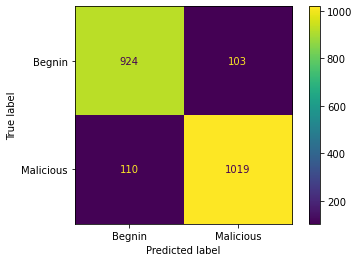

In [66]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# GAUSSIAN NB

In [67]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)


In [68]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 56.72%
Train f1 : 70.29%
Train recall : 99.91%
Train precision : 54.22%


In [69]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Gaussian Naive Bayes'] = [acc,recall,precision,f1]

Test accuracy : 57.51%
Test f1 : 71.09%
Test recall : 99.73%
Test precision : 55.22%


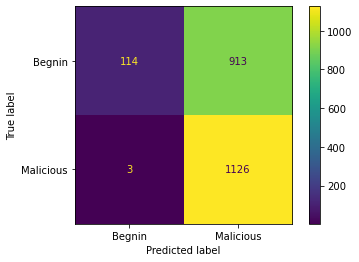

In [70]:
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# MLP

In [71]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(60,20,5),
                                           solver='sgd', batch_size=100, max_iter=100,
                                           learning_rate_init=.01, momentum=0.9,
                                           verbose=True, random_state=0)

mlp.fit(X_train, y_train);

y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

Iteration 1, loss = 0.61308367
Iteration 2, loss = 0.34744300
Iteration 3, loss = 0.24469379
Iteration 4, loss = 0.21969224
Iteration 5, loss = 0.20287685
Iteration 6, loss = 0.19134022
Iteration 7, loss = 0.18075624
Iteration 8, loss = 0.17376507
Iteration 9, loss = 0.16585861
Iteration 10, loss = 0.16079841
Iteration 11, loss = 0.15109462
Iteration 12, loss = 0.14409298
Iteration 13, loss = 0.13925379
Iteration 14, loss = 0.13483835
Iteration 15, loss = 0.12872548
Iteration 16, loss = 0.12396232
Iteration 17, loss = 0.11869781
Iteration 18, loss = 0.11384194
Iteration 19, loss = 0.10916487
Iteration 20, loss = 0.10784632
Iteration 21, loss = 0.10301025
Iteration 22, loss = 0.09744304
Iteration 23, loss = 0.09474186
Iteration 24, loss = 0.09364947
Iteration 25, loss = 0.08920282
Iteration 26, loss = 0.08355535
Iteration 27, loss = 0.07996645
Iteration 28, loss = 0.07718469
Iteration 29, loss = 0.07326657
Iteration 30, loss = 0.07495818
Iteration 31, loss = 0.07058028
Iteration 32, los

In [72]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 98.26%
Train f1 : 98.31%
Train recall : 98.91%
Train precision : 97.72%


In [73]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['MLP'] = [acc,recall,precision,f1]

Test accuracy : 91.09%
Test f1 : 91.60%
Test recall : 92.74%
Test precision : 90.49%


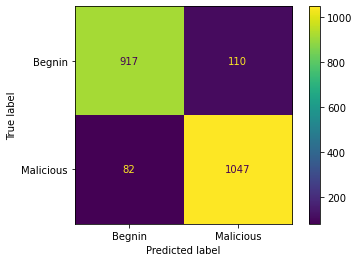

In [74]:
plot_confusion_matrix(mlp, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# SVC

In [75]:
y_train_svm = y_train*2 - 1
y_test_svm = y_test*2-1
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X_train, y_train_svm)

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [76]:
t_acc = accuracy_score(y_train_svm, y_pred_train)
t_f1 = f1_score(y_train_svm, y_pred_train)
t_recall = recall_score(y_train_svm, y_pred_train)
t_precision = precision_score(y_train_svm, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 89.00%
Train f1 : 89.35%
Train recall : 89.95%
Train precision : 88.75%


In [77]:
acc = accuracy_score(y_test_svm, y_pred_test)
f1 = f1_score(y_test_svm, y_pred_test)
recall = recall_score(y_test_svm, y_pred_test)
precision = precision_score(y_test_svm, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['SVM'] = [acc,recall,precision,f1]

Test accuracy : 88.73%
Test f1 : 89.33%
Test recall : 90.08%
Test precision : 88.59%


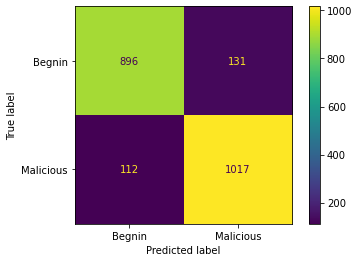

In [78]:
plot_confusion_matrix(svm, X_test, y_test_svm, display_labels=['Begnin','Malicious']) 
plt.show()

# ADA BOOSTING

In [79]:
AdaB= AdaBoostClassifier(n_estimators=3, algorithm='SAMME', random_state=0).fit(X_train,y_train)

y_pred_train = AdaB.predict(X_train)
y_pred_test = AdaB.predict(X_test)

In [80]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 69.20%
Train f1 : 63.18%
Train recall : 51.57%
Train precision : 81.54%


In [81]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc))
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall))
print('Test precision : %.2f%%'% (100*precision))

Performance['Ada Boosting'] = [acc,recall,precision,f1]

Test accuracy : 69.85%
Test f1 : 65.24%
Test recall : 54.03%
Test precision : 82.32%


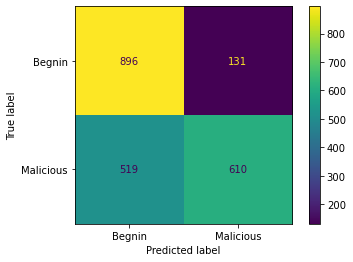

In [82]:
plot_confusion_matrix(AdaB, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# RESULTS COMPARISON

In [83]:
Performance

,Metrics,Decision Tree,Random Forest,LR,KNN,Gaussian Naive Bayes,MLP,SVM,Ada Boosting
0,Accuracy,0.879870,0.847866,0.847866,0.901206,0.575139,0.910946,0.887291,0.698516
1,Recall,0.886625,0.846767,0.846767,0.902569,0.997343,0.927369,0.900797,0.540301
2,Precision,0.884276,0.860486,0.860486,0.908200,0.552231,0.904927,0.885889,0.823212
3,F1-score,0.885449,0.853571,0.853571,0.905375,0.710859,0.916010,0.893281,0.652406
